# <font color = orange>  __Students Data Analysis__

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing Dataset

In [2]:
data = pd.read_excel('datadisciplinary.xlsx', sheet_name= 'Sheet1', engine= 'openpyxl')

In [3]:
data.head()

,ENROLLMENTNO,STUDENTNAME,PROGRAMCODE,BRANCHCODE,SEMESTER,DISCIPLINARYGRADE
0,151356,ARAV SOOD,B.T.,CSE,2,A+
1,151356,ARAV SOOD,B.T.,CSE,4,A+
2,151356,ARAV SOOD,B.T.,CSE,6,A+
3,151356,ARAV SOOD,B.T.,CSE,8,A+
4,151442,JOSHITA SHARMA,B.T.,CSE,2,A+


In [4]:
data.tail()

,ENROLLMENTNO,STUDENTNAME,PROGRAMCODE,BRANCHCODE,SEMESTER,DISCIPLINARYGRADE
1691,161844,ABHISHEK DOGRA,B.T.,BT,8,A+
1692,161845,BANDANA THAKUR,B.T.,BT,2,A+
1693,161845,BANDANA THAKUR,B.T.,BT,4,A+
1694,161845,BANDANA THAKUR,B.T.,BT,6,A+
1695,161845,BANDANA THAKUR,B.T.,BT,8,A+


#### Total Number of Students Enrolled

In [5]:
data['STUDENTNAME'].nunique()

418

#### Total Number of Semesters

In [6]:
data['SEMESTER'].unique()

array([2, 4, 6, 8])

418 students are enrolled in different branches for 2nd, 4th, 6th and 8th semesters

### Programs Offered

In [7]:
data['PROGRAMCODE'].unique()

array(['B.T.'], dtype=object)

Only BTech program is offered

### Different Branches

In [8]:
data['BRANCHCODE'].unique()

array(['CSE', 'CE', 'ECE', 'IT', 'BI', 'BT'], dtype=object)

There are 6 different branches

### Semester-Wise Disciplinary Grade Distribution 

In [9]:
grouped = data.groupby(['SEMESTER', 'BRANCHCODE'])['DISCIPLINARYGRADE'].value_counts().unstack(fill_value=0)

In [10]:
print(grouped)

DISCIPLINARYGRADE     A   A+  B+
SEMESTER BRANCHCODE             
2        BI           0   15   0
         BT           1   32   0
         CE           1   74   0
         CSE          5  167   3
         ECE          0   99   1
         IT           1   25   0
4        BI           1   14   0
         BT           0   33   0
         CE           1   74   0
         CSE          1  174   0
         ECE          0  100   0
         IT           0   26   0
6        BI           0   15   0
         BT           3   30   0
         CE           1   74   0
         CSE          5  170   0
         ECE          4   96   0
         IT           5   20   1
8        BI           0   15   0
         BT           1   32   0
         CE           0   75   0
         CSE         10  165   0
         ECE          1   99   0
         IT           1   25   0


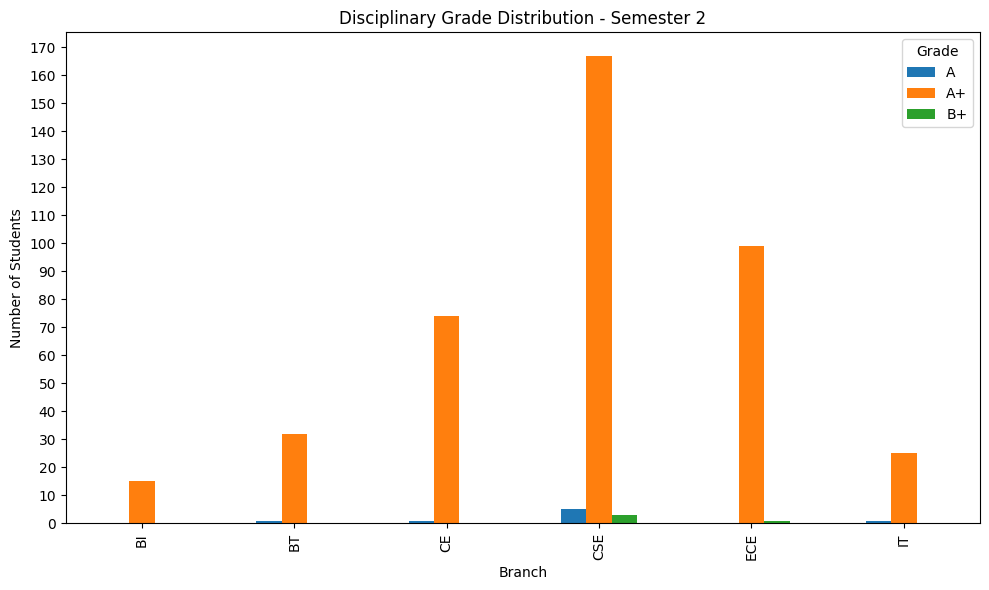

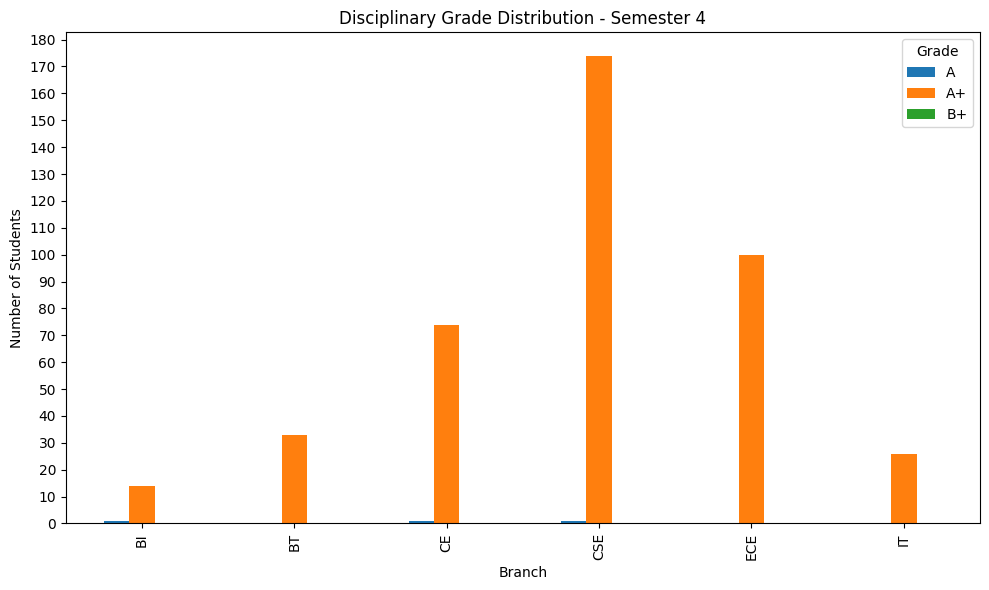

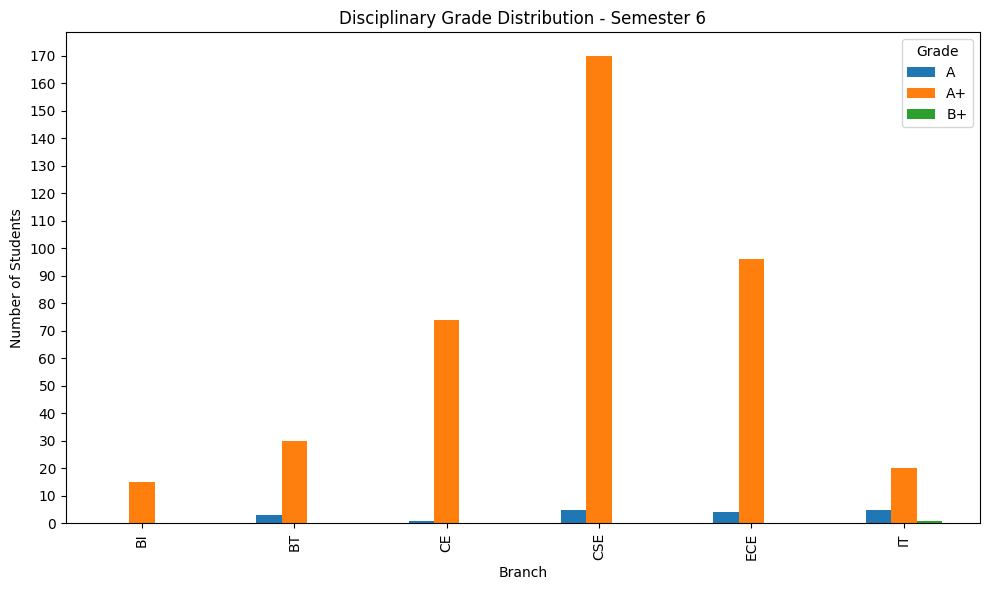

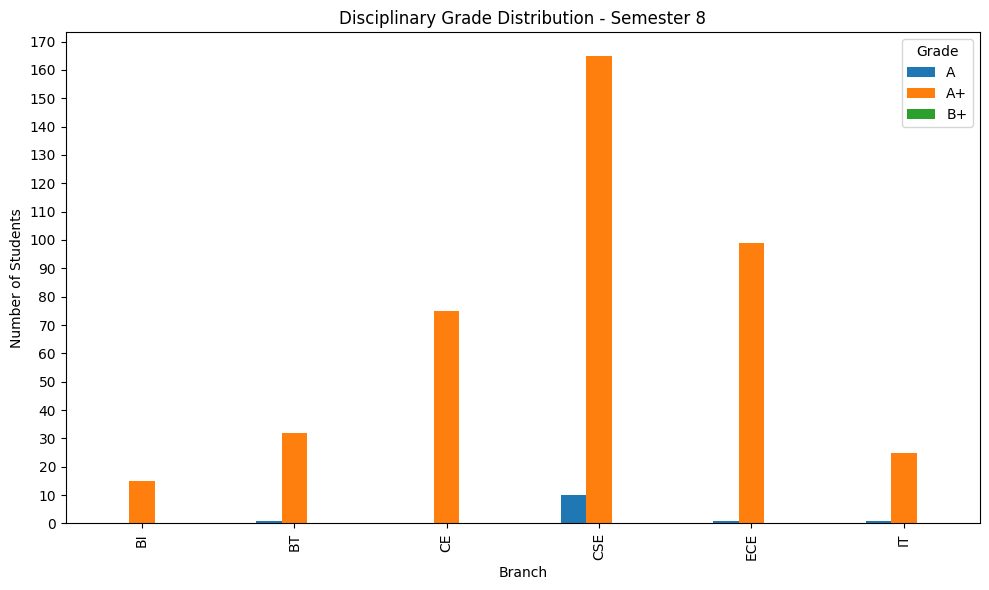

In [11]:
for semester in sorted(data['SEMESTER'].unique()):
    semdata = grouped.loc[semester] #Data for one semester
    
    #Plotting
    semdata.plot(kind='bar', stacked = False , figsize=(10, 6))
    plt.title(f'Disciplinary Grade Distribution - Semester {semester}')
    plt.xlabel('Branch')
    plt.ylabel('Number of Students')
    plt.legend(title='Grade')
    
    max_y = semdata.values.max()
    yticks = np.arange(0, max_y+10, 10)
    plt.yticks(yticks)
    plt.tight_layout()
    plt.show()

### Branch with highest average disciplinary grade

In [12]:
grade_map = {'A+':5, 'A':4, 'B+':3}

data['NUMERICGRADE'] = data['DISCIPLINARYGRADE'].map(grade_map)

In [13]:
branch_avg = data.groupby('BRANCHCODE')['NUMERICGRADE'].mean()
print("Average Disciplinary Grade per Branch: ", branch_avg)

Average Disciplinary Grade per Branch:  BRANCHCODE
BI     4.983333
BT     4.962121
CE     4.990000
CSE    4.961429
ECE    4.982500
IT     4.913462
Name: NUMERICGRADE, dtype: float64


Branch with highest average disciplinary grade is CE (4.99)

### Enrolment count by Branch and Semester

In [14]:
enroll = data.groupby(['BRANCHCODE', 'SEMESTER'])['BRANCHCODE'].count()
enroll

BRANCHCODE  SEMESTER
BI          2            15
            4            15
            6            15
            8            15
BT          2            33
            4            33
            6            33
            8            33
CE          2            75
            4            75
            6            75
            8            75
CSE         2           175
            4           175
            6           175
            8           175
ECE         2           100
            4           100
            6           100
            8           100
IT          2            26
            4            26
            6            26
            8            26
Name: BRANCHCODE, dtype: int64

Total number of students enrolled in BI are 15 in each semester which is the lowest.
Total number of students enrolled in CSE are 175 in each semester which is the highest.